In [1]:
#解压数据集
!unzip -oq data/data129645/RockData.zip -d data/
#运行一次就够了
#运行一次就够了
#运行一次就够了

In [2]:
#查看数据集目录树
!tree data/RockData/

data/RockData/
├── Basalt
│   ├── Basalt10.jpg
│   ├── Basalt11.jpg
│   ├── Basalt12.jpg
│   ├── Basalt13.jpg
│   ├── Basalt14.jpg
│   ├── Basalt15.jpg
│   ├── Basalt16.jpg
│   ├── Basalt17.jpg
│   ├── Basalt18.jpg
│   ├── Basalt19.jpg
│   ├── Basalt1.jpg
│   ├── Basalt21.jpg
│   ├── Basalt23.jpg
│   ├── Basalt25.jpg
│   ├── Basalt26.jpg
│   ├── Basalt27.jpg
│   ├── Basalt30.jpg
│   ├── Basalt31.jpg
│   ├── Basalt32.jpg
│   ├── Basalt33.jpg
│   ├── Basalt34.jpg
│   ├── Basalt35.jpg
│   ├── Basalt37.jpg
│   ├── Basalt38.jpg
│   ├── Basalt3.jpg
│   ├── Basalt40.jpg
│   ├── Basalt41.jpg
│   ├── Basalt42.jpg
│   ├── Basalt43.jpg
│   ├── Basalt45.jpg
│   ├── Basalt49.jpg
│   ├── Basalt4.jpg
│   ├── Basalt50.jpg
│   ├── Basalt54.jpg
│   ├── Basalt57.jpg
│   ├── Basalt58.jpg
│   ├── Basalt59.jpg
│   ├── Basalt5.jpg
│   ├── Basalt60.jpg
│   ├── Basalt61.jpg
│   ├── Basalt62.jpg
│   ├── Basalt64.jpg
│   ├── Basalt65.jpg
│   ├── Basalt67.jpg
│   ├── Basalt68.jpg
│   ├── Basalt6.jpg
│   ├── Basal

In [3]:
# 引入依赖库
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt

>>>/home/aistudio/data/RockData/Coal/Coal260.jpg
>>>/home/aistudio/data/RockData/Coal/Coal68.jpg
>>>/home/aistudio/data/RockData/Coal/Coal219.jpg
>>>/home/aistudio/data/RockData/Coal/Coal242.jpg


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


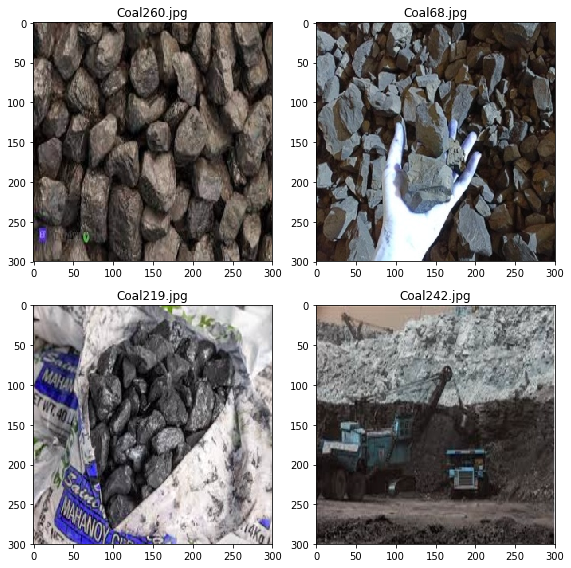

In [4]:
#图片抽样

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

#读取数据集中一个文件夹的路径
file_dir = '/home/aistudio/data/RockData/Coal/'
#设立列表存储图片名
filesum = []
#读取图片名
for root, dirs, files in os.walk(file_dir): 
    filesum.append(files)
filesum = filesum[0]
#打印图片名看看效果符不符合预期
#print(filesum)
#定义画布大小
plt.figure(figsize=(8, 8))
#循环读取图片并显示
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.title(filesum[i])
    image = file_dir+filesum[i]
    print(f">>>{image}")
    plt.imshow(cv2.imread(image,1))
plt.tight_layout()
plt.show()

In [5]:
#使用pip安装方式安装2.1.0版本：
!pip install paddlex==2.1.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


In [6]:
#在模型进行训练时，我们需要划分训练集，验证集和测试集
#因此需要对如上数据进行划分，直接使用paddlex命令即可将数据集随机划分成70%训练集，20%验证集和10%测试集
#划分好的数据集会额外生成labels.txt, train_list.txt, val_list.txt, test_list.txt四个文件，之后可直接进行训练。
!paddlex --split_dataset --format ImageNet --dataset_dir /home/aistudio/data/RockData --val_value 0.2 --test_value 0.1

[02-26 23:09:47 MainThread @logger.py:242] Argv: /opt/conda/envs/python35-paddle120-env/bin/paddlex --split_dataset --format ImageNet --dataset_dir /home/aistudio/data/RockData --val_value 0.2 --test_value 0.1
[02-26 23:09:47 MainThread @utils.py:79] WRN paddlepaddle version: 2.2.2. The dynamic graph version of PARL is under development, not fully tested and supported
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/parl/remote/communication.py:38: DeprecationWarning: 'pyarrow.default_serialization_context' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  context = pyarrow.default_serialization_context()
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/en

In [11]:
#在训练和验证过程中，数据的处理
from paddlex import transforms as T
train_transforms = T.Compose([
    T.RandomCrop(crop_size=224),
    T.Normalize()])

eval_transforms = T.Compose([
    T.ResizeByShort(short_size=256),
    T.CenterCrop(crop_size=224),
    T.Normalize()
])

In [8]:
import paddlex as pdx
#定义数据集，pdx.datasets.ImageNet表示读取ImageNet格式的分类数据集：
train_dataset = pdx.datasets.ImageNet(
    data_dir='/home/aistudio/data/RockData',
    file_list='/home/aistudio/data/RockData/train_list.txt',
    label_list='/home/aistudio/data/RockData/labels.txt',
    transforms=train_transforms,
    shuffle=True)
eval_dataset = pdx.datasets.ImageNet(
    data_dir='/home/aistudio/data/RockData',
    file_list='/home/aistudio/data/RockData/val_list.txt',
    label_list='/home/aistudio/data/RockData/labels.txt',
    transforms=eval_transforms)

2022-02-26 23:09:53 [INFO]	Starting to read file list from dataset...
2022-02-26 23:09:54 [INFO]	1442 samples in file /home/aistudio/data/RockData/train_list.txt
2022-02-26 23:09:54 [INFO]	Starting to read file list from dataset...
2022-02-26 23:09:54 [INFO]	408 samples in file /home/aistudio/data/RockData/val_list.txt


In [9]:
#使用百度基于蒸馏方法得到的MobileNetV3预训练模型，模型结构与MobileNetV3一致，但精度更高。


num_classes = len(train_dataset.labels)
model = pdx.cls.MobileNetV3_small(num_classes=num_classes)

model.train(num_epochs=10,
            train_dataset=train_dataset,
            train_batch_size=32,
            eval_dataset=eval_dataset,
            lr_decay_epochs=[4, 6, 8],
            save_dir='output/mobilenetv3_small',
            use_vdl=True)
#use_vdl=True表示可以启动visualdl并查看可视化的指标变化情况。

W0226 23:09:54.022707  1994 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.0, Runtime API Version: 10.1
W0226 23:09:54.027238  1994 device_context.cc:465] device: 0, cuDNN Version: 7.6.


2022-02-26 23:09:55 [INFO]	Loading pretrained model from output/mobilenetv3_small/pretrain/MobileNetV3_small_x1_0_pretrained.pdparams
2022-02-26 23:09:56 [WARNING]	[SKIP] Shape of pretrained params fc.weight doesn't match.(Pretrained: (1280, 1000), Actual: [1280, 7])
2022-02-26 23:09:56 [WARNING]	[SKIP] Shape of pretrained params fc.bias doesn't match.(Pretrained: (1000,), Actual: [7])
2022-02-26 23:09:56 [INFO]	There are 212/214 variables loaded into MobileNetV3_small_x1_0.
2022-02-26 23:09:57 [INFO]	[TRAIN] Epoch=1/10, Step=10/45, loss=1.408256, acc1=0.406250, acc5=1.000000, lr=0.025000, time_each_step=0.11s, eta=0:0:50
2022-02-26 23:09:58 [INFO]	[TRAIN] Epoch=1/10, Step=20/45, loss=1.092545, acc1=0.656250, acc5=0.968750, lr=0.025000, time_each_step=0.07s, eta=0:0:30
2022-02-26 23:09:58 [INFO]	[TRAIN] Epoch=1/10, Step=30/45, loss=1.229077, acc1=0.468750, acc5=0.968750, lr=0.025000, time_each_step=0.07s, eta=0:0:29
2022-02-26 23:09:59 [INFO]	[TRAIN] Epoch=1/10, Step=40/45, loss=1.4749

2022-02-26 23:10:47 [INFO]	Model[MobileNetV3_small] loaded.
Predict Result:  [{'category_id': 1, 'category': 'Coal', 'score': 0.99494815}]


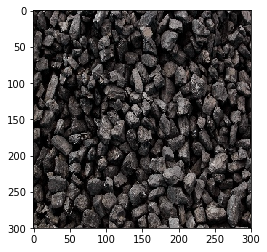

In [10]:
#模型在训练过程中，会每间隔一定轮数保存一次模型
#在验证集上评估效果最好的一轮会保存在save_dir目录下的best_model文件夹
#加载模型，进行预测：
import paddlex as pdx
model = pdx.load_model('output/mobilenetv3_small/best_model')
result = model.predict('/home/aistudio/data/RockData/Coal/Coal0.jpg')
plt.imshow(cv2.imread('/home/aistudio/data/RockData/Coal/Coal0.jpg',1))
print("Predict Result: ", result)